In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np

data_dir = r'/Users/tanmay/Desktop/JOB/Calls/MLB/data/ds1/'

In [149]:
df = pd.read_csv(r'/Users/tanmay/Desktop/JOB/Calls/MLB/ds1.csv')

In [150]:
df = df.iloc[:,1:]

In [151]:
df.head()

,x1,x2,x3,x5,x6,ya,yb,yc
0,2.642583,-1.715220,1.909334,0.027139,-3.447187,13.630850,1.828765,0.008386
1,4.588761,-2.507543,4.239107,1.704150,-2.782809,7.834582,2.162110,0.000008
2,7.919796,-5.108415,3.039451,0.992815,5.551587,-5.107041,2.797083,-0.000005
3,2.616757,-2.124040,2.855570,0.990079,1.694697,19.015046,1.953887,0.038017
4,3.300856,-5.159684,0.764544,0.143581,3.277496,-9.818862,1.922446,0.001178


In [152]:
variance = pd.DataFrame(df.var()).T
variance.index=['variance']

skewness = pd.DataFrame(df.skew()).T
skewness.index=['skewness']

In [153]:
df_summary = round(pd.concat([variance, skewness, df.describe()]),3)
df_summary.to_csv(data_dir+'summary_stats.csv')
df_summary

,x1,x2,x3,x5,x6,ya,yb,yc
variance,8.257,4.003,3.073,1.004,21.752,339.979,0.592,0.001
skewness,-0.008,-0.000,-0.004,2.040,0.004,0.311,-0.524,0.720
count,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000
mean,5.011,-3.006,2.501,0.999,0.001,3.828,2.112,0.000
std,2.874,2.001,1.753,1.002,4.664,18.439,0.769,0.031
min,0.000,-12.499,-3.489,0.000,-13.885,-64.022,-0.524,-0.543
25%,2.536,-4.354,1.190,0.286,-2.612,-8.998,1.580,-0.002
50%,5.022,-3.003,2.504,0.691,-0.001,2.667,2.231,-0.000
75%,7.486,-1.649,3.802,1.387,2.622,15.580,2.733,0.002
max,10.000,6.090,8.679,15.103,13.925,107.714,3.841,0.818


In [154]:
df.corr()[['ya','yb','yc']]

,ya,yb,yc
x1,0.465431,0.945973,0.002746
x2,0.675648,-0.001495,0.000495
x3,0.411148,0.775455,-0.001078
x5,0.002463,0.004666,0.002866
x6,0.001964,0.001163,-0.000150
ya,1.000000,0.572271,0.421504
yb,0.572271,1.000000,0.203275
yc,0.421504,0.203275,1.000000


In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['x1', 'x2', 'x3', 'x5', 'x6']], df[['ya', 'yb', 'yc']], test_size=0.33, random_state=42)

In [313]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

#model = LinearRegression()
#model = RandomForestRegressor(n_estimators=10, random_state=42)
#model = SVR(kernel="linear")
#model = DecisionTreeRegressor(random_state=42)

In [157]:
model_list = [LinearRegression(), RandomForestRegressor(n_estimators=10, random_state=42), DecisionTreeRegressor(random_state=42)]

## yb

In [160]:
colname = ['yb']
print(df[colname].describe())
print('\n')

model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train[colname])
ya_pred = model.predict(X_test)
mse = mean_squared_error(y_test[colname], ya_pred)
rmse = np.sqrt(mse)
print(model)
print('RMSE: ' + str(rmse))
print('R2 Score: '+ str(r2_score(y_test[colname], ya_pred)))
try:
    print(np.around(model.coef_,4))
except:
    print(np.around(model.feature_importances_,4))
print('\n')

                  yb
count  100000.000000
mean        2.111854
std         0.769306
min        -0.523672
25%         1.580212
50%         2.231057
75%         2.733318
max         3.841363




//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)
RMSE: 0.21485768917183054
R2 Score: 0.9221050586867445
[0.9463 0.0135 0.0134 0.0133 0.0135]




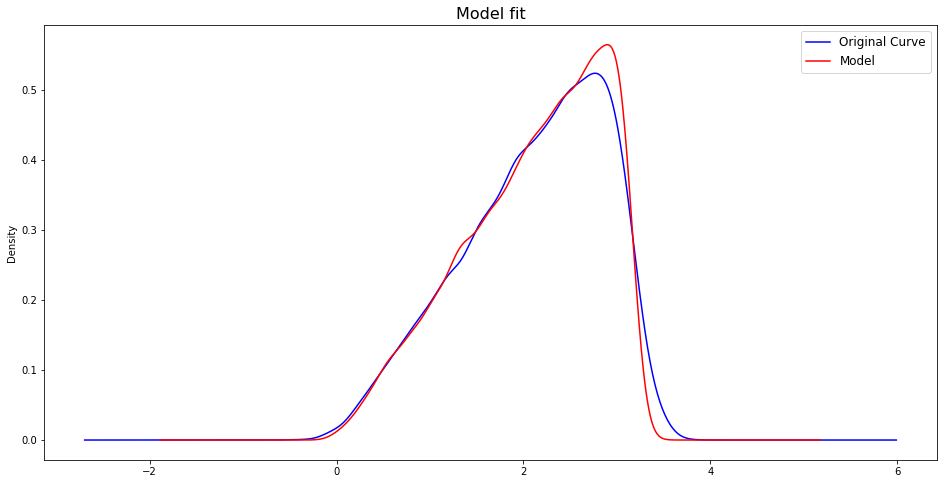

In [14]:
y_test['yb'].plot(kind='kde',c='b')
pd.Series(ya_pred).plot(kind='kde',c='r')
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.title('Model fit', size=16)
plt.legend(['Original Curve', 'Model'], fontsize = 'large')
plt.show()

## ya

In [15]:
df['ya'].describe()

count    100000.000000
mean          3.827867
std          18.438514
min         -64.021995
25%          -8.998020
50%           2.666992
75%          15.579687
max         107.713997
Name: ya, dtype: float64

(array([1.1300e+02, 2.3240e+03, 1.6245e+04, 3.5546e+04, 2.9296e+04,
        1.2762e+04, 3.2130e+03, 4.5000e+02, 4.6000e+01, 5.0000e+00]),
 array([-64.02199458, -46.84839544, -29.6747963 , -12.50119717,
          4.67240197,  21.84600111,  39.01960025,  56.19319939,
         73.36679852,  90.54039766, 107.7139968 ]),
 <a list of 10 Patch objects>)

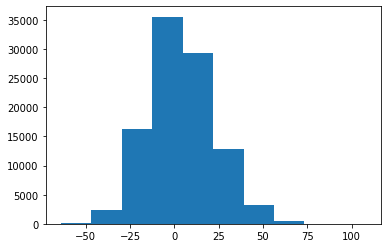

In [16]:
plt.hist(df['ya'])

In [17]:
round(df.corr()[['ya']],3)

,ya
x1,0.465
x2,0.676
x3,0.411
x5,0.002
x6,0.002
ya,1.000
yb,0.572
yc,0.422


In [161]:
for i in np.arange(5):
    print(i)
    X = X_train[['x1','x2','x3']]
    vector = y_train[['ya']]
    predict = X_test[['x1','x2','x3']]

    poly = PolynomialFeatures(degree=i)
    X_ = poly.fit_transform(X)
    predict_ = poly.fit_transform(predict)

    clf = LinearRegression()
    clf.fit(X_, vector)
    z = clf.predict(predict_)
    mse = mean_squared_error(y_test['ya'], z)
    rmse = np.sqrt(mse)
    print(np.around(clf.coef_,4))
    print(rmse)
    print('R2 Score: '+ str(r2_score(y_test['ya'], z)))

0
[[0.]]
18.463781091901605
R2 Score: -5.61609155431686e-05
1
[[0.     2.5241 6.2254 0.9348]]
10.47648125017018
R2 Score: 0.6780310547482367
2
[[ 0.0000e+00  3.0142e+00  3.6880e+00  8.5380e-01  9.9800e-02  5.0660e-01
   1.7200e-02  2.4000e-03  7.0000e-03 -3.0000e-04]]
10.020561616984216
R2 Score: 0.7054444361645033
3
[[ 0.0000e+00  3.0869e+00  3.1354e+00  8.1350e-01  2.5000e-01  8.8470e-01
   1.4500e-02  2.4900e-02 -4.0700e-02 -1.3300e-02 -1.6800e-02 -3.3200e-02
   0.0000e+00  3.6000e-03 -1.0600e-02 -5.3000e-03  2.0000e-03 -9.1000e-03
   9.7000e-03  9.1000e-03]]
10.000691228639994
R2 Score: 0.7066114626436342
4
[[-0.0000e+00  3.1911e+00  2.7090e+00  6.9730e-01  3.8840e-01  1.3371e+00
   1.5720e-01 -1.5600e-02 -1.2480e-01 -5.5900e-02 -5.2900e-02 -1.4670e-01
  -6.9400e-02  1.6100e-02  2.1800e-02  6.4200e-02  1.2000e-03 -1.1900e-02
   6.4000e-03 -1.6800e-02  1.7000e-03  8.5000e-03  1.1600e-02  2.0000e-04
  -5.1000e-03 -2.4500e-02  6.0000e-04 -3.3000e-03 -4.0000e-04  2.3700e-02
   3.0000e-

In [19]:
a = list(poly.get_feature_names())

In [20]:
b = list(list(np.around(clf.coef_,4))[0])

In [21]:
a

['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [22]:
b

[0.0, 3.0142, 3.688, 0.8538, 0.0998, 0.5066, 0.0172, 0.0024, 0.007, -0.0003]

In [23]:
[str(i)+'*'+str(j)+'+' for i,j in zip(a,b)]

['1*0.0+',
 'x0*3.0142+',
 'x1*3.688+',
 'x2*0.8538+',
 'x0^2*0.0998+',
 'x0 x1*0.5066+',
 'x0 x2*0.0172+',
 'x1^2*0.0024+',
 'x1 x2*0.007+',
 'x2^2*-0.0003+']

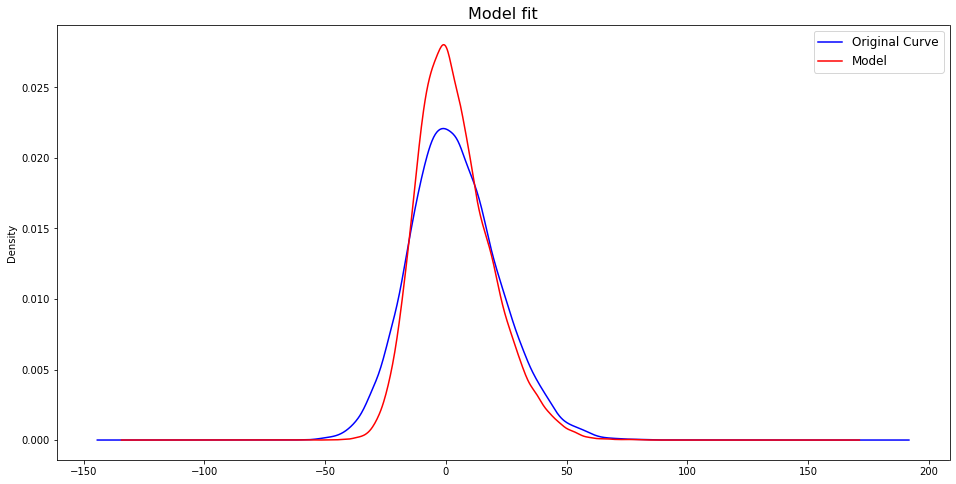

In [24]:
y_test['ya'].plot(kind='kde',c='b')
pd.Series([i[0] for i in list(z)]).plot(kind='kde',c='r')
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.title('Model fit', size=16)
plt.legend(['Original Curve', 'Model'], fontsize = 'large')
plt.show()

## yc

In [265]:
round(df.corr()[['yc']],3)

,yc
x1,0.003
x2,0.000
x3,-0.001
x5,0.003
x6,-0.000
ya,0.422
yb,0.203
yc,1.000


In [266]:
round(df.describe()[['yc']],3)

,yc
count,100000.000
mean,0.000
std,0.031
min,-0.543
25%,-0.002
50%,-0.000
75%,0.002
max,0.818


In [302]:
df_yc = copy.deepcopy(df[['x1', 'x2', 'x3', 'x5', 'x6','yc']])

In [303]:
df_yc.describe()

,x1,x2,x3,x5,x6,yc
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,5.011059,-3.005565,2.500593,0.999136,0.000647,1.022765e-04
std,2.873568,2.000799,1.752906,1.002006,4.663860,3.121215e-02
min,0.000015,-12.498524,-3.489212,0.000003,-13.885453,-5.433613e-01
25%,2.536309,-4.353844,1.189920,0.285629,-2.611943,-2.423158e-03
50%,5.022191,-3.002649,2.503764,0.690903,-0.000611,-5.670000e-10
75%,7.486275,-1.649283,3.802236,1.386862,2.621841,2.476745e-03
max,9.999887,6.089820,8.679097,15.102966,13.924740,8.183882e-01


In [304]:
for i in df_yc.columns[:-1]:
    df_yc[i] = (df_yc[i] - df_yc[i].min())/(df_yc[i].max() - df_yc[i].min())

In [305]:
X_train, X_test, y_train, y_test = train_test_split(df_yc[['x1', 'x2', 'x3', 'x5', 'x6']], df_yc[['yc']], test_size=0.33, random_state=42)

In [306]:
df_yc.head()

,x1,x2,x3,x5,x6,yc
0,0.264260,0.580111,0.443656,0.001797,0.375340,0.008386
1,0.458881,0.537486,0.635119,0.112835,0.399229,0.000008
2,0.791988,0.397567,0.536530,0.065736,0.698918,-0.000005
3,0.261678,0.558118,0.521419,0.065555,0.560232,0.038017
4,0.330088,0.394809,0.349577,0.009507,0.617146,0.001178


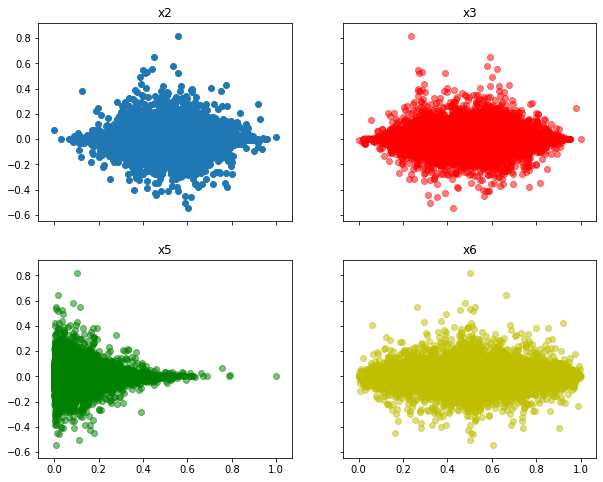

In [319]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(df_yc['x2'], df_yc['yc'])
axs[0, 0].set_title('x2')
axs[0, 1].scatter(df_yc['x3'], df_yc['yc'], c='r', alpha = 0.5)
axs[0, 1].set_title('x3')
axs[1, 0].scatter(df_yc['x5'], df_yc['yc'], c='g', alpha = 0.5)
axs[1, 0].set_title('x5')
axs[1, 1].scatter(df_yc['x6'], df_yc['yc'], c='y', alpha = 0.5)
axs[1, 1].set_title('x6')

for ax in axs.flat:
    ax.label_outer()

fig = plt.gcf()
fig.set_size_inches(10,8)

In [308]:
round(df_yc['yc'].describe(),3)

count    100000.000
mean          0.000
std           0.031
min          -0.543
25%          -0.002
50%          -0.000
75%           0.002
max           0.818
Name: yc, dtype: float64

In [309]:
from sklearn import neighbors

In [316]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(X_train,y_train['yc'])
clf.best_params_

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 1.5, 'epsilon': 0.1, 'gamma': 1e-07, 'kernel': 'poly'}

In [317]:
clf.best_estimator_

SVR(C=1.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-07,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [318]:
colname = ['yc']

model = clf.best_estimator_
model = SVR()
model.fit(X_train, y_train[colname])
ya_pred = model.predict(X_test)
mse = mean_squared_error(y_test[colname], ya_pred)
rmse = np.sqrt(mse)
print(model)
print('RMSE: ' + str(rmse))
print('R2 Score: '+ str(r2_score(y_test[colname], ya_pred)))
print('\n')

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
RMSE: 0.03142507832469157
R2 Score: -0.01557829700904656




In [321]:
ya_pred

array([0.00202739, 0.0037622 , 0.00301265, ..., 0.00347924, 0.0077659 ,
       0.00290703])

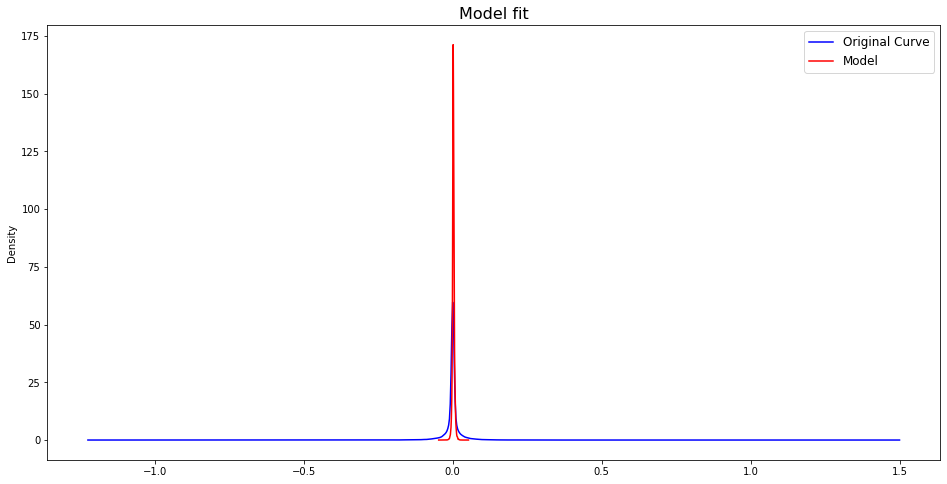

In [322]:
y_test['yc'].plot(kind='kde',c='b')
pd.Series(ya_pred).plot(kind='kde',c='r')
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.title('Model fit', size=16)
plt.legend(['Original Curve', 'Model'], fontsize = 'large')
plt.show()